In [ ]:
import pandas as pd

df = pd.read_csv('feeds (4).csv')

df['created_at'] = pd.to_datetime(df['created_at'])

start_time = '2024-04-06 12:00:00'
end_time = '2024-04-07 12:00:00'

filtered_df = df[(df['created_at'] >= start_time) & (df['created_at'] <= end_time)]

filtered_df.to_csv('indoor_data.csv', index=False)


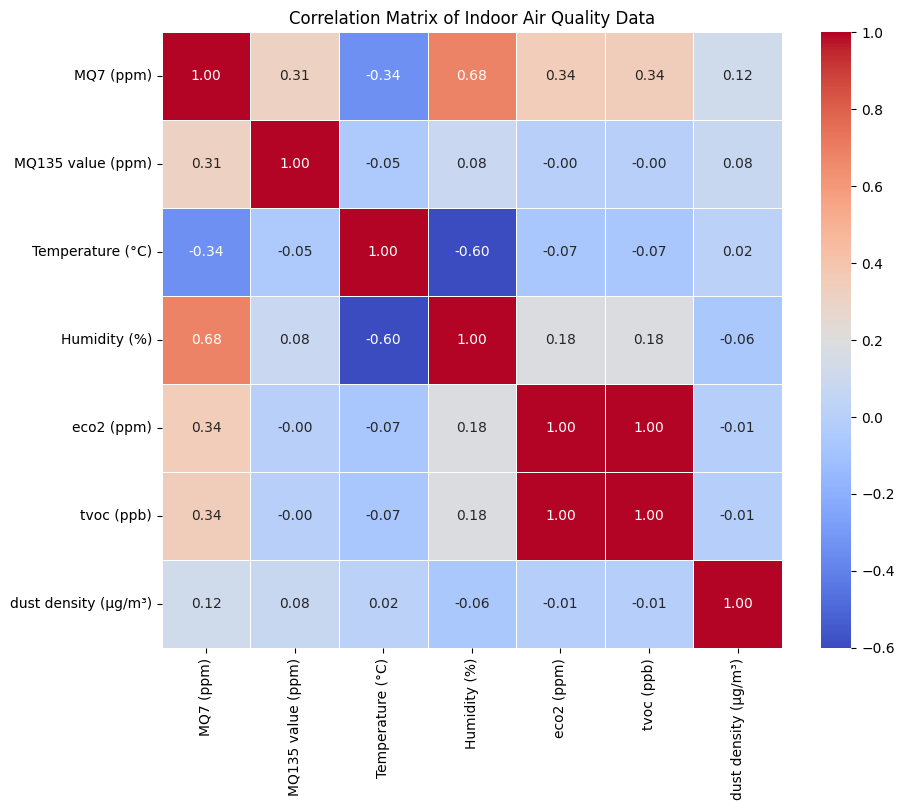

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('indoor_data.csv')

df.rename(columns={'field1': 'MQ7 (ppm)',
                   'field2': 'MQ135 value (ppm)',
                   'field3': 'Temperature (°C)',
                   'field4': 'Humidity (%)',
                   'field5': 'eco2 (ppm)',
                   'field6': 'tvoc (ppb)',
                   'field7': 'dust density (µg/m³)'}, inplace=True)

df_numeric = df[['MQ7 (ppm)', 'MQ135 value (ppm)', 'Temperature (°C)', 'Humidity (%)', 'eco2 (ppm)', 'tvoc (ppb)', 'dust density (µg/m³)']]

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Indoor Air Quality Data")
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('indoor_data.csv')

df.rename(columns={'field1': 'MQ7 (ppm)',
                   'field2': 'MQ135 value (ppm)',
                   'field3': 'Temperature (°C)',
                   'field4': 'Humidity (%)',
                   'field5': 'eco2 (ppm)',
                   'field6': 'tvoc (ppb)',
                   'field7': 'dust density (µg/m³)'}, inplace=True)

numeric_columns = ['MQ7 (ppm)', 'MQ135 value (ppm)', 'Temperature (°C)', 'Humidity (%)', 'eco2 (ppm)', 'tvoc (ppb)', 'dust density (µg/m³)']
df_numeric = df[numeric_columns]

average_data = df_numeric.mean()

print("\nAverage Sensor Data:")
print(average_data)



Average Sensor Data:
MQ7 (ppm)               185.722431
MQ135 value (ppm)        40.119280
Temperature (°C)         32.807502
Humidity (%)             55.381845
eco2 (ppm)              650.113278
tvoc (ppb)               37.633158
dust density (µg/m³)     14.775694
dtype: float64


In [ ]:
import pandas as pd

df = pd.read_csv('indoor_data.csv')

df.rename(columns={'field1': 'MQ7 (ppm)',
                   'field2': 'MQ135 value (ppm)',
                   'field3': 'Temperature (°C)',
                   'field4': 'Humidity (%)',
                   'field5': 'eco2 (ppm)',
                   'field6': 'tvoc (ppb)',
                   'field7': 'dust density (µg/m³)'}, inplace=True)

print("\nMaximum values of all pollutants:")
print(df.max())

print("\nMinimum values of all pollutants:")
print(df.min())



Maximum values of all pollutants:
created_at              2024-04-07 11:59:46+05:30
entry_id                                     2588
MQ7 (ppm)                                     228
MQ135 value (ppm)                            50.0
Temperature (°C)                             34.2
Humidity (%)                                 69.0
eco2 (ppm)                                 1518.0
tvoc (ppb)                                  184.0
dust density (µg/m³)                        625.0
latitude                                      NaN
longitude                                     NaN
elevation                                     NaN
status                                        NaN
dtype: object

Minimum values of all pollutants:
created_at              2024-04-06 12:00:27+05:30
entry_id                                     1256
MQ7 (ppm)                                     149
MQ135 value (ppm)                            35.0
Temperature (°C)                             30.7
Humidity (%)    

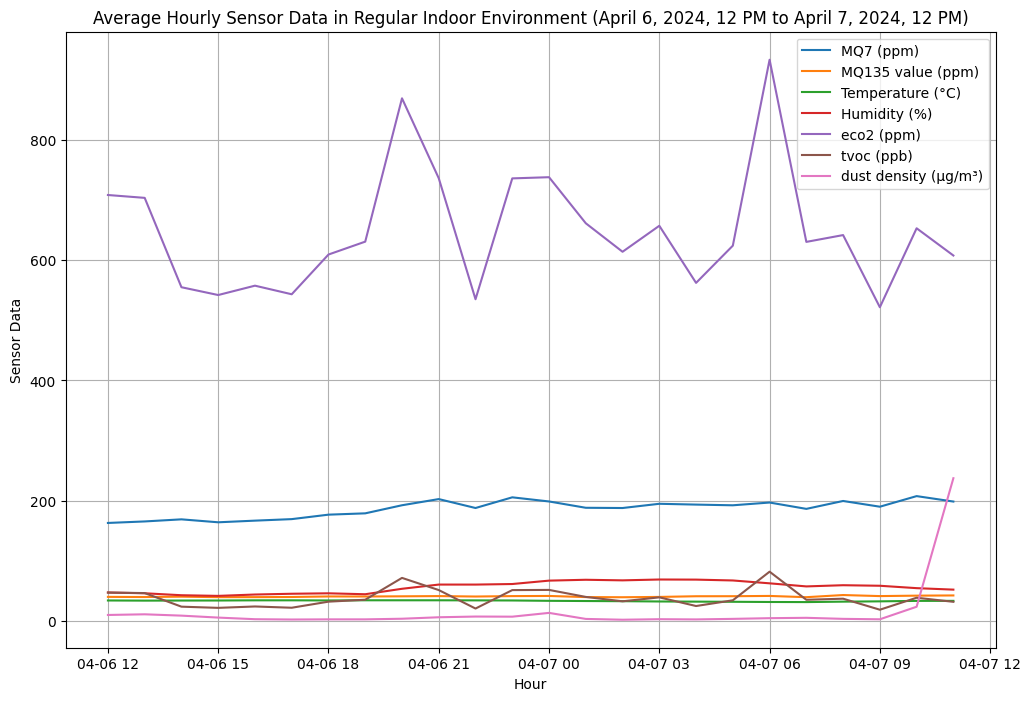

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("indoor_data.csv")

data['created_at'] = pd.to_datetime(data['created_at'])

start_timestamp = pd.Timestamp("2024-04-06 12:00:00+05:30")
end_timestamp = pd.Timestamp("2024-04-07 12:00:00+05:30")
filtered_data = data[(data['created_at'] >= start_timestamp) & (data['created_at'] <= end_timestamp)]

filtered_data['hour'] = filtered_data['created_at'].dt.floor('H')

average_hourly_data = filtered_data.groupby('hour').mean()[['field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'field7']]

average_hourly_data = average_hourly_data.rename(columns={'field1': 'MQ7 (ppm)',
                                                          'field2': 'MQ135 value (ppm)',
                                                          'field3': 'Temperature (°C)',
                                                          'field4': 'Humidity (%)',
                                                          'field5': 'eco2 (ppm)',
                                                          'field6': 'tvoc (ppb)',
                                                          'field7': 'dust density (µg/m³)'})

plt.figure(figsize=(12, 8))
for column in average_hourly_data.columns:
    plt.plot(average_hourly_data.index, average_hourly_data[column], label=column)

plt.title("Average Hourly Sensor Data in Regular Indoor Environment (April 6, 2024, 12 PM to April 7, 2024, 12 PM)")
plt.xlabel("Hour")
plt.ylabel("Sensor Data")
plt.legend()
plt.grid(True)
plt.show()


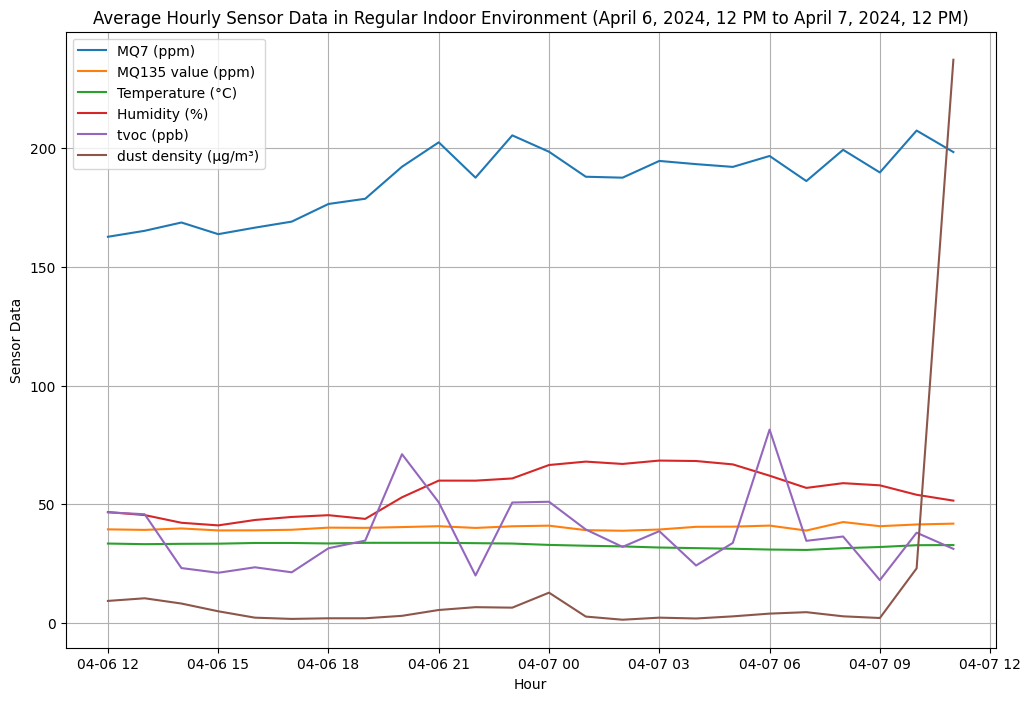

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("indoor_data.csv")

data['created_at'] = pd.to_datetime(data['created_at'])

start_timestamp = pd.Timestamp("2024-04-06 12:00:00+05:30")
end_timestamp = pd.Timestamp("2024-04-07 12:00:00+05:30")
filtered_data = data[(data['created_at'] >= start_timestamp) & (data['created_at'] <= end_timestamp)]

filtered_data['hour'] = filtered_data['created_at'].dt.floor('H')

average_hourly_data = filtered_data.groupby('hour').mean()[['field1', 'field2', 'field3', 'field4', 'field6', 'field7']]

average_hourly_data = average_hourly_data.rename(columns={'field1': 'MQ7 (ppm)',
                                                          'field2': 'MQ135 value (ppm)',
                                                          'field3': 'Temperature (°C)',
                                                          'field4': 'Humidity (%)',
                                                          'field6': 'tvoc (ppb)',
                                                          'field7': 'dust density (µg/m³)'})

plt.figure(figsize=(12, 8))
for column in average_hourly_data.columns:
    plt.plot(average_hourly_data.index, average_hourly_data[column], label=column)

plt.title("Average Hourly Sensor Data in Regular Indoor Environment (April 6, 2024, 12 PM to April 7, 2024, 12 PM)")
plt.xlabel("Hour")
plt.ylabel("Sensor Data")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('indoor_data.csv')

df.rename(columns={'field1': 'MQ7 (ppm)',
                   'field2': 'MQ135 value (ppm)',
                   'field3': 'Temperature (°C)',
                   'field4': 'Humidity (%)',
                   'field5': 'eco2 (ppm)',
                   'field6': 'tvoc (ppb)',
                   'field7': 'dust density (µg/m³)'}, inplace=True)

print("\nStatistics of Data for All Pollutants:")
print(df.describe())



Statistics of Data for All Pollutants:
          entry_id    MQ7 (ppm)  MQ135 value (ppm)  Temperature (°C)  \
count  1333.000000  1333.000000        1333.000000       1333.000000   
mean   1922.000000   185.722431          40.119280         32.807502   
std     384.948265    14.976140           2.779974          0.982079   
min    1256.000000   149.000000          35.000000         30.700000   
25%    1589.000000   172.000000          38.000000         31.800000   
50%    1922.000000   188.000000          40.000000         33.300000   
75%    2255.000000   196.000000          42.000000         33.700000   
max    2588.000000   228.000000          50.000000         34.200000   

       Humidity (%)   eco2 (ppm)   tvoc (ppb)  dust density (µg/m³)  latitude  \
count   1333.000000  1333.000000  1333.000000           1333.000000       0.0   
mean      55.381845   650.113278    37.633158             14.775694       NaN   
std        9.547913   147.260830    22.571535             72.178114 

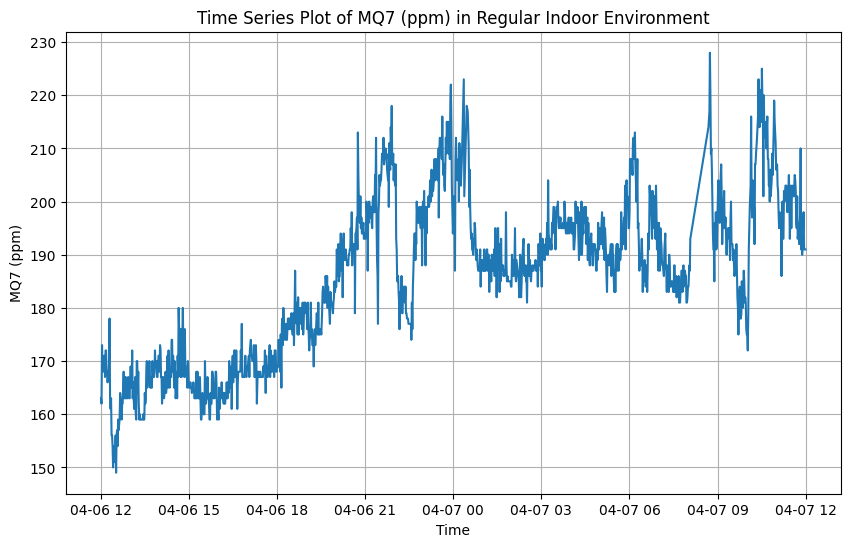

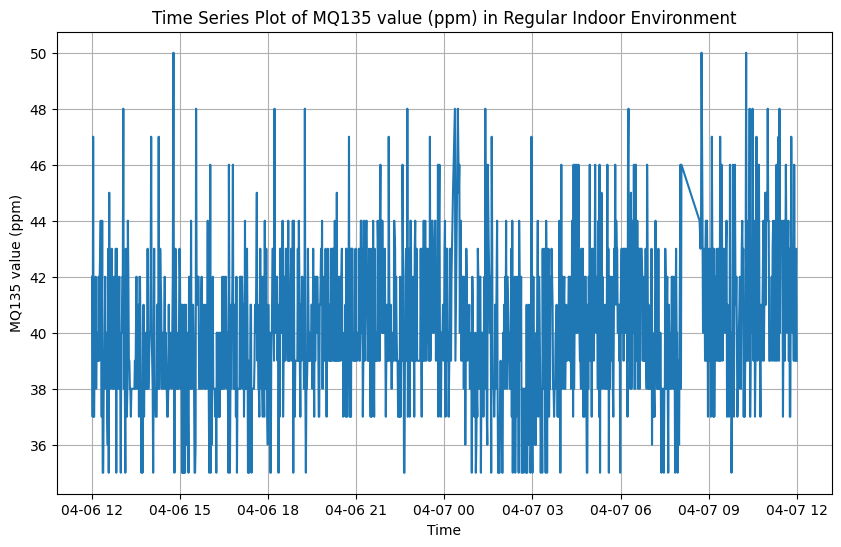

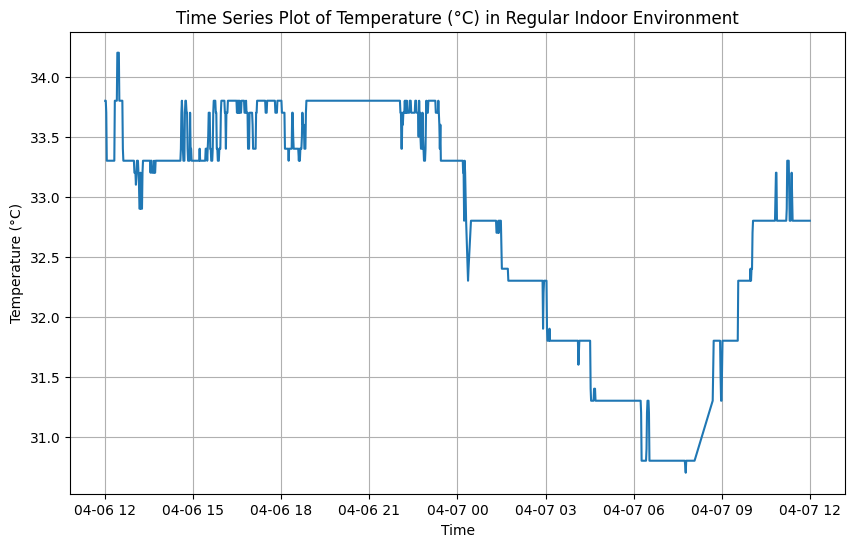

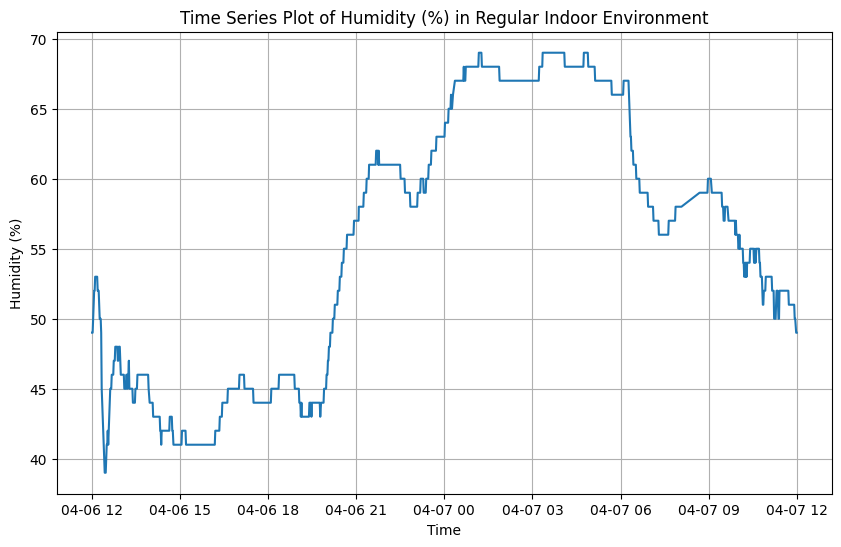

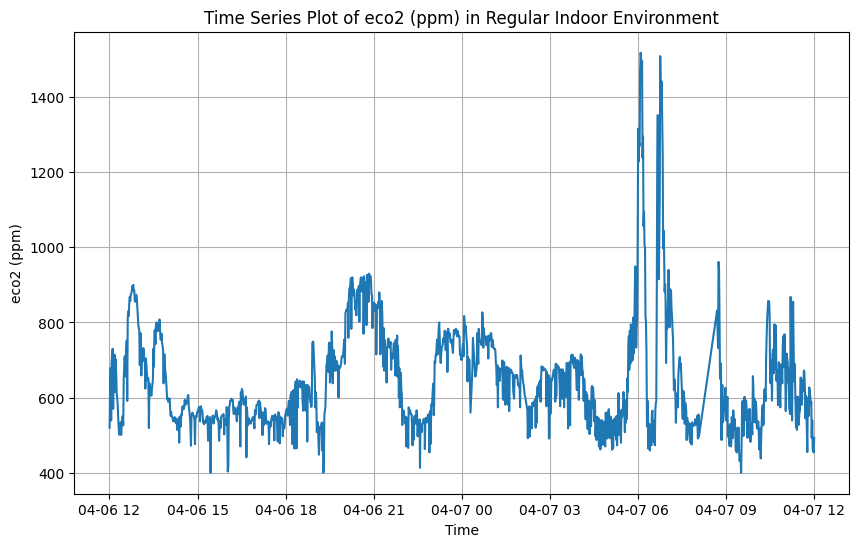

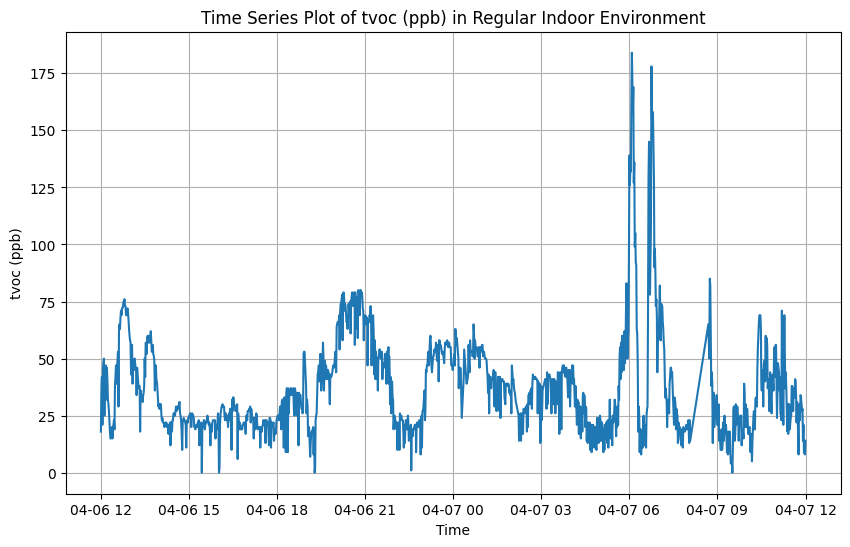

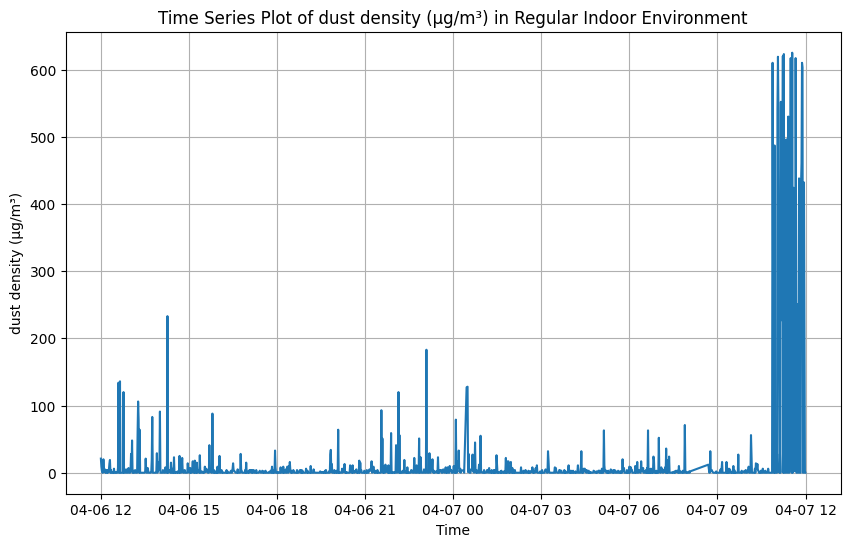

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('indoor_data.csv')

df.rename(columns={'field1': 'MQ7 (ppm)',
                   'field2': 'MQ135 value (ppm)',
                   'field3': 'Temperature (°C)',
                   'field4': 'Humidity (%)',
                   'field5': 'eco2 (ppm)',
                   'field6': 'tvoc (ppb)',
                   'field7': 'dust density (µg/m³)'}, inplace=True)

df['created_at'] = pd.to_datetime(df['created_at'])

pollutants = ['MQ7 (ppm)', 'MQ135 value (ppm)', 'Temperature (°C)', 'Humidity (%)', 'eco2 (ppm)', 'tvoc (ppb)', 'dust density (µg/m³)']
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    plt.plot(df['created_at'], df[pollutant])
    plt.title("Time Series Plot of " + pollutant + " in Regular Indoor Environment")
    plt.xlabel("Time")
    plt.ylabel(pollutant)
    plt.grid(True)
    plt.show()


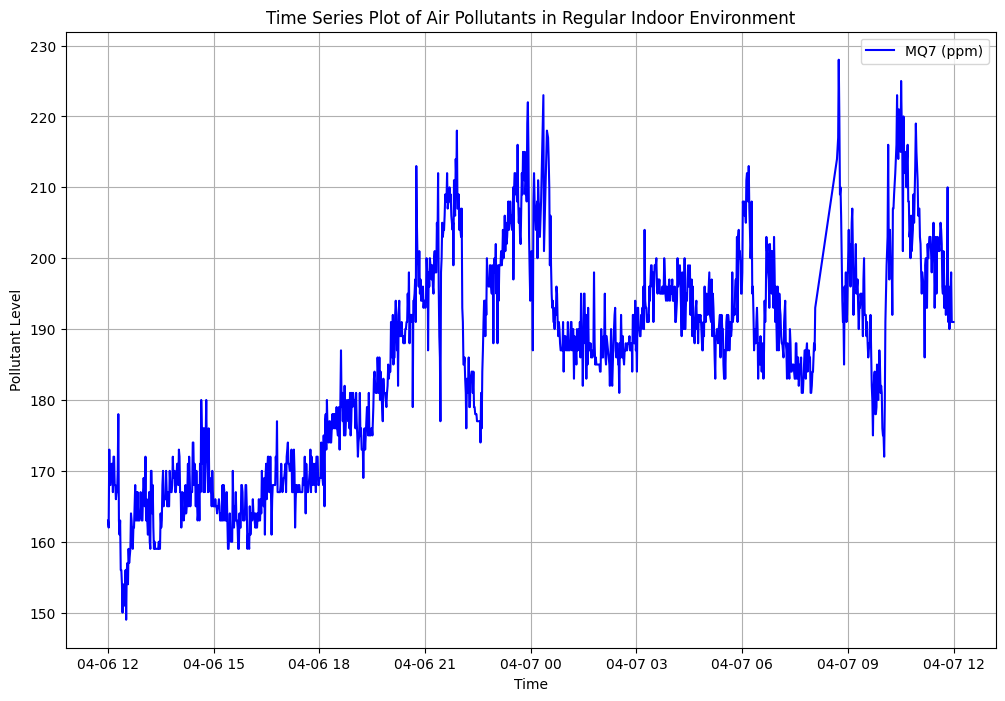

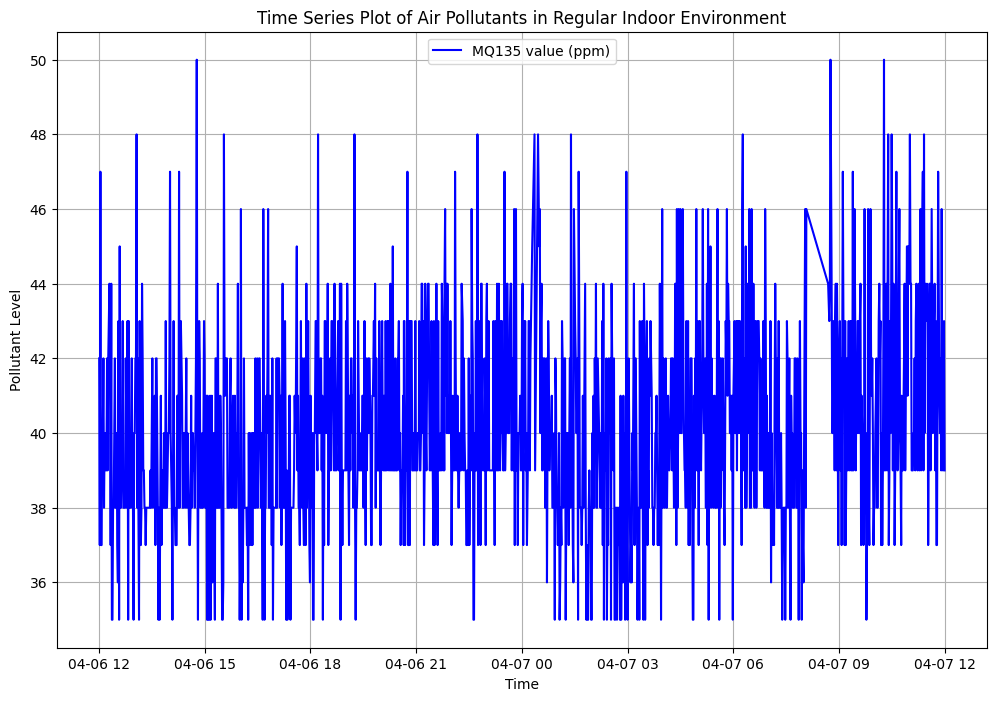

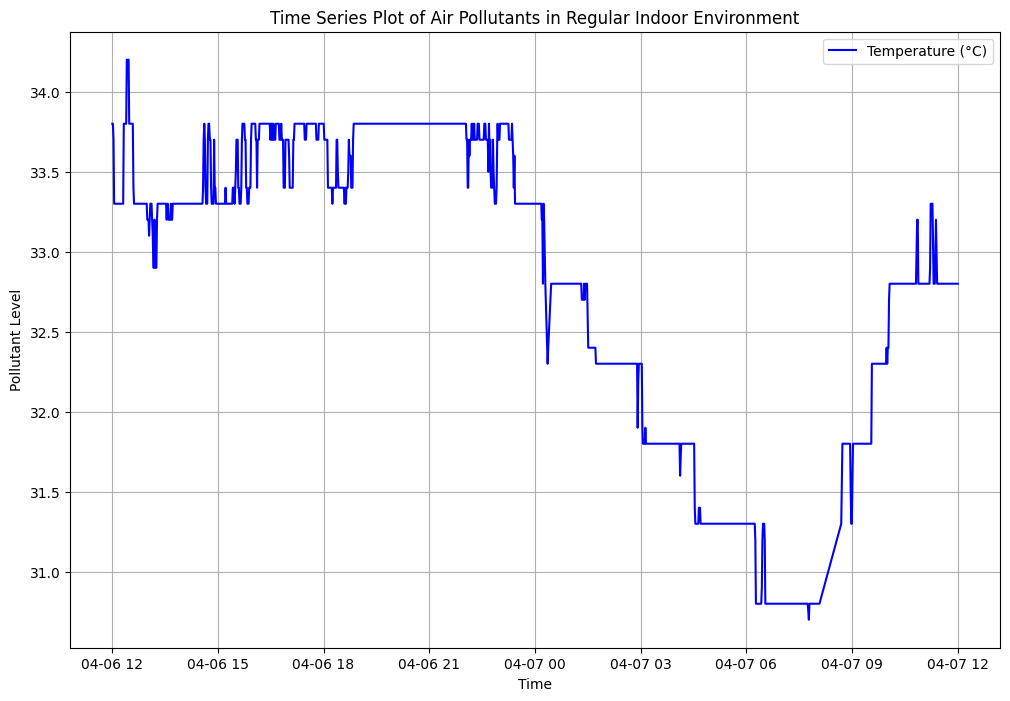

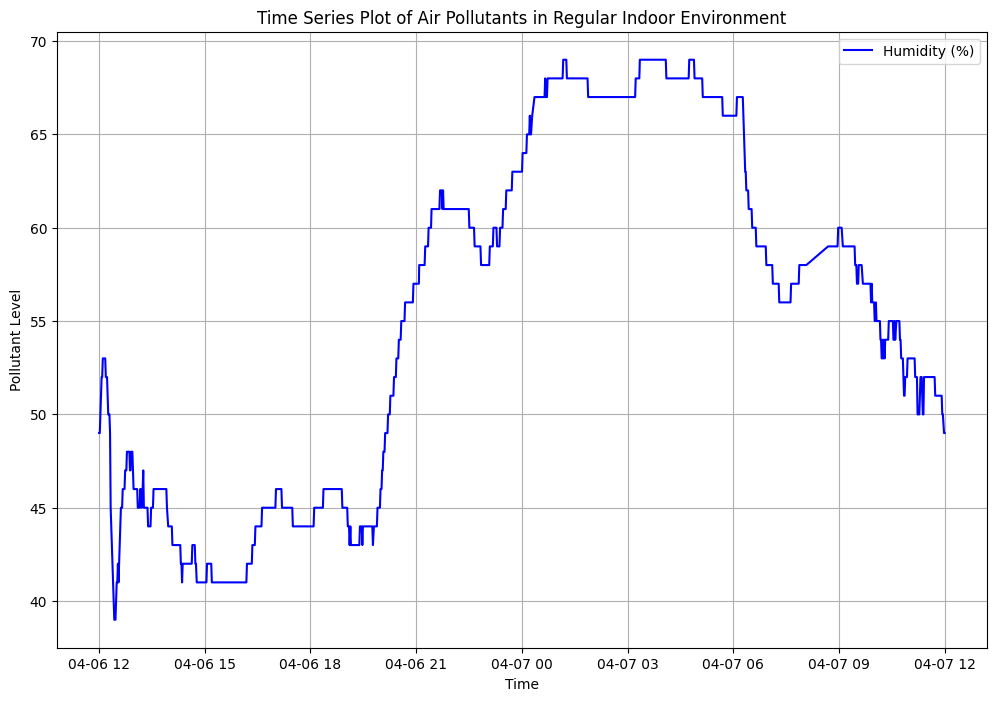

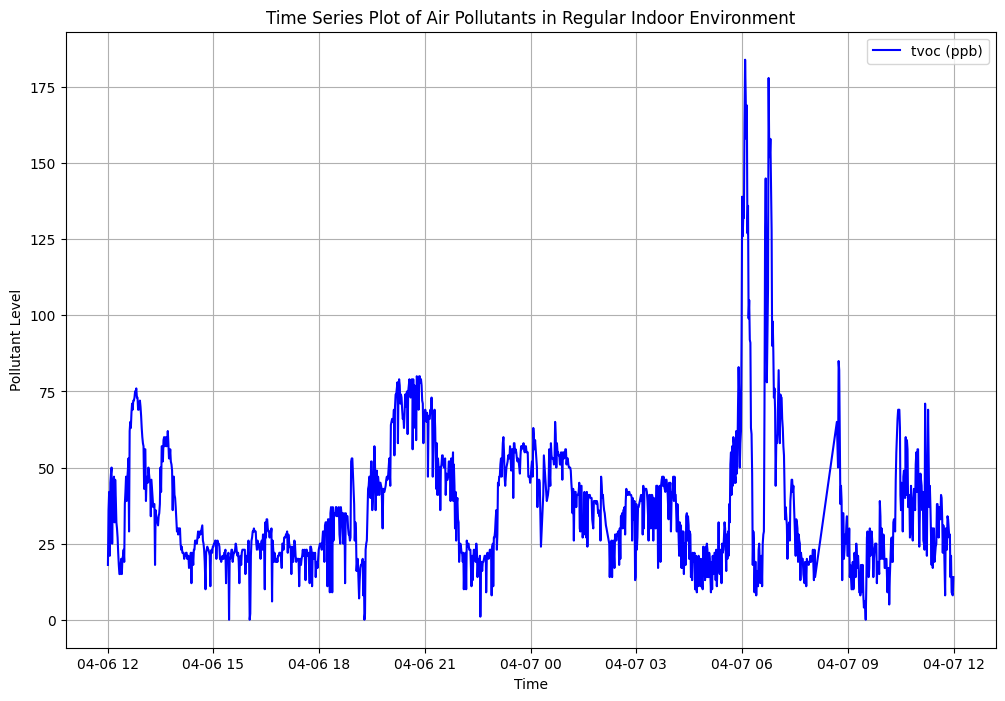

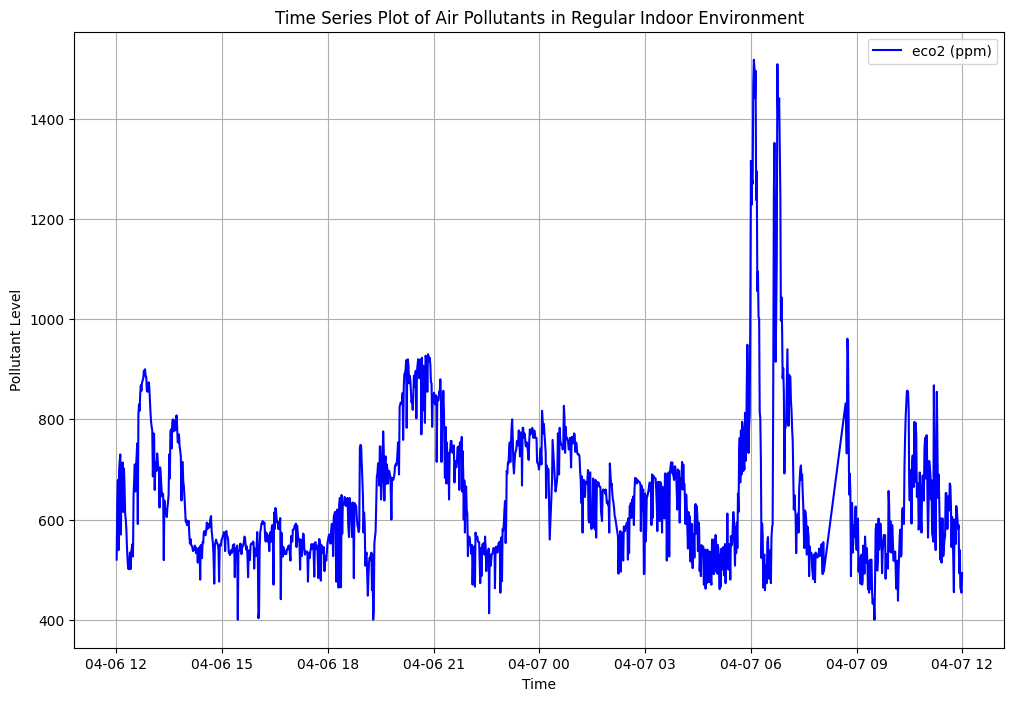

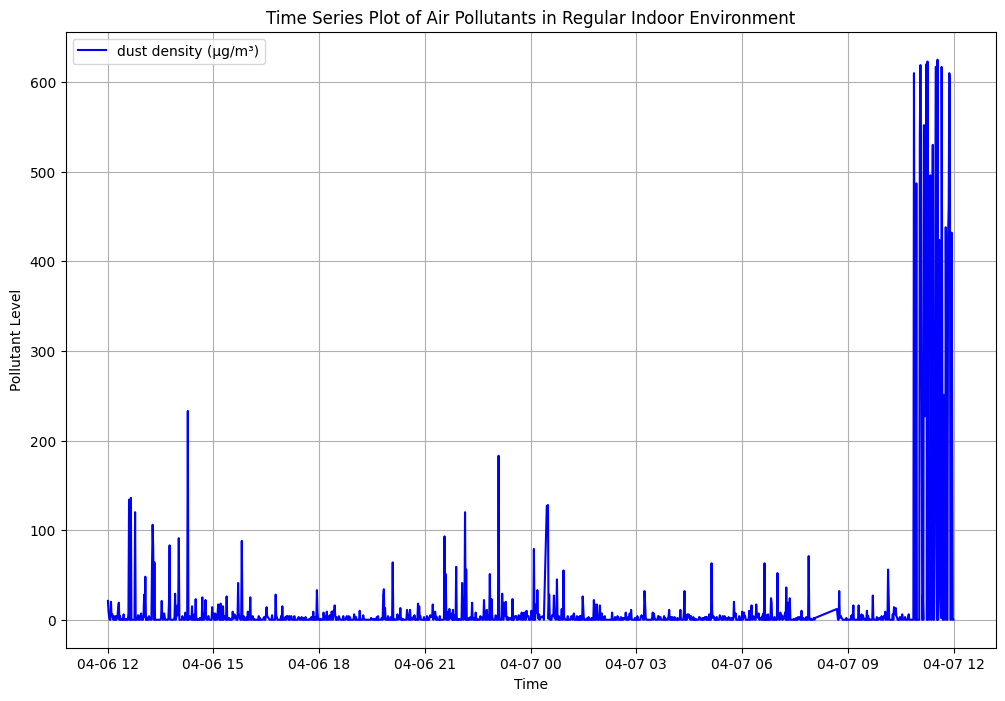

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("indoor_data.csv")

data['created_at'] = pd.to_datetime(data['created_at'])

plt.figure(figsize=(12, 8))
color = 'blue'

plt.plot(data['created_at'], data['field1'], label='MQ7 (ppm)', color=color)
plt.title("Time Series Plot of Air Pollutants in Regular Indoor Environment")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(data['created_at'], data['field2'], label='MQ135 value (ppm)', color=color)
plt.title("Time Series Plot of Air Pollutants in Regular Indoor Environment")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(data['created_at'], data['field3'], label='Temperature (°C)', color=color)
plt.title("Time Series Plot of Air Pollutants in Regular Indoor Environment")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(data['created_at'], data['field4'], label='Humidity (%)', color=color)
plt.title("Time Series Plot of Air Pollutants in Regular Indoor Environment")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(data['created_at'], data['field6'], label='tvoc (ppb)', color=color)
plt.title("Time Series Plot of Air Pollutants in Regular Indoor Environment")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(data['created_at'], data['field5'], label='eco2 (ppm)', color=color)
plt.title("Time Series Plot of Air Pollutants in Regular Indoor Environment")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
plt.plot(data['created_at'], data['field7'], label='dust density (µg/m³)', color=color)
plt.title("Time Series Plot of Air Pollutants in Regular Indoor Environment")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()
